# Two-Layer Neural Networks

In this part of the homework, we will work on building a simple Neural Network to classify digits using MNIST dataset. There are many powerful neural network frameworks nowadays that are relatively straightforward to use. However, we believe that in order to understand the theory behind neural networks, and to have the right intuitions in order to build, use, and debug more complex architectures, one must first start from the basics.

Your task is to complete the missing codes needed for training and testing of a simple fully-connected neural network.

The missing parts will be marked with TODO#N, where N represents the task number.

Many parts in this homework are modified from Stanford's cs231n assignments.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from cattern.neural_net import TwoLayerNet

%load_ext autoreload
%autoreload 2

In [12]:
# Just a function that verifies if your answers are correct

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cattern/neural_net.py` to represent instances of our network. The network parameters (weights and biases) are stored in the instance variable `self.params` where the keys are parameter names and values are numpy arrays. Below, we initialize some toy data and a toy model that will guide you with your implementation.

In [13]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cattern/neural_net.py` and look at the method `TwoLayerNet.loss`. This function takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Complete TODO#1 in `TwoLayerNet.loss`, by implementing the first part of the forward pass which uses the weights and biases to compute the scores for all inputs. The scores refer to the output of the network just before the softmax layer.

In [14]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, complete TODO#2 by implementing the second part that computes the data and regularizaion loss.

In [15]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))
print(loss, correct_loss)

Difference between your loss and correct loss:
1.7985612998927536e-13
1.3037878913298202 1.30378789133


# Backward pass
Implement the rest of the function by completing TODO#3. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [16]:
from cattern.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 4.447656e-11
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
W1 max relative error: 4.090897e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD). Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure (TODO#4-6). You will also have to implement `TwoLayerNet.predict` (TODO#7), as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.05.

Final training loss:  0.017143643532923757


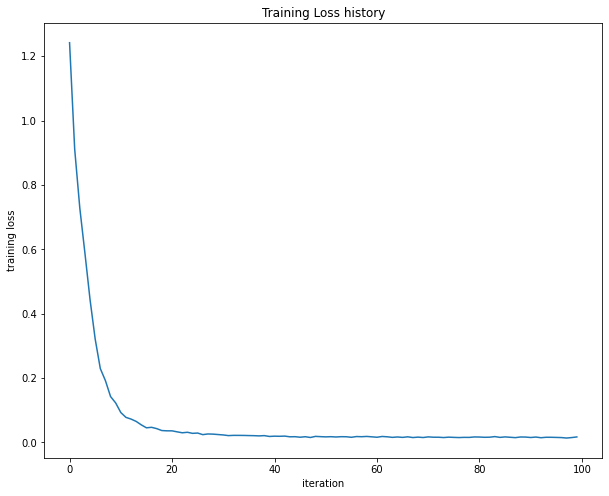

In [17]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up MNIST data so we can use it to train a classifier on a real dataset.

In [18]:
from mnist_data import load_mnist


def get_mnist_data(num_training=55000, num_validation=5000, num_test=10000):
    """
    Load the MNIST dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier.
    """
    # Load the raw MNIST data
    X_train, y_train, X_val, y_val, X_test, y_test = load_mnist.read_data_sets('mnist_data')

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train = X_train - mean_image
    X_val = X_val - mean_image
    X_test = X_test - mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_mnist_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Train data shape:  (55000, 784)
Train labels shape:  (55000,)
Validation data shape:  (5000, 784)
Validation labels shape:  (5000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


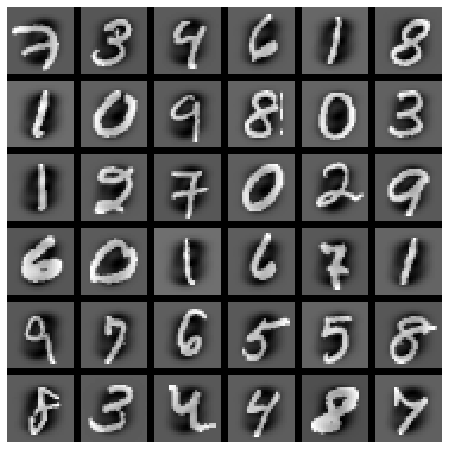

In [19]:
from mnist_data.vis_utils import visualize_grid

# Visualize mnist data

def show_mnist_image(data):
  data = data.reshape(-1, 28, 28, 1)
  plt.imshow(visualize_grid(data, padding=3).astype('uint8').squeeze(axis=2))
  plt.gca().axis('off')
  plt.show()

show_mnist_image(X_train[:36])

# Train a network
To train our network we will use SGD with momentum. We will use fixed learning rate to train this model.

In [20]:
input_size = 28 * 28 * 1
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=1,
            reg=0, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.8922


# Learning Rate Decay

In the previous run, we used the same learning rate during the whole training process. This fix-sized learning rate disregards the benefit of larger learning rate at the beginning of the training, and it might suffer from overshooting around the minima.

Add learning rate decay to the train function, run the model again with larger starting learning rate and learning rate decay, then compare the losses.

In [61]:
net = TwoLayerNet(input_size, hidden_size, num_classes)
stats_LRDecay = net.train(X_train, y_train, X_val, y_val,
                    num_iters=2000, batch_size=200,
                    learning_rate=5e-4, learning_rate_decay=0.95,
                    reg=0, verbose=True)

# Predict on the validation set
val_acc_LRDecay = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc_LRDecay)

Validation accuracy:  0.9436


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.94 on the validation set. This isn't very good for MNIST data which has reports of up to 0.99 accuracy.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized. 

(You can think of the first layer weights as a projection W^TX. This is very similar to how we project our training data using PCA projection in our previous homework. Just like how we visualize the eigenfaces. We can also visualize the weights of the neural network in the same manner.)

Below, we will also show you lossed between two models we trained above. Do you notice the difference between the two?

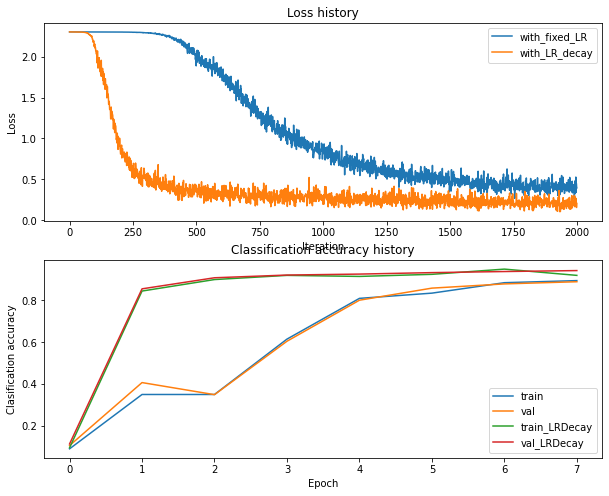

In [62]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'], label='with_fixed_LR')
plt.plot(stats_LRDecay['loss_history'], label='with_LR_decay')
plt.title('Loss history')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.plot(stats_LRDecay['train_acc_history'], label='train_LRDecay')
plt.plot(stats_LRDecay['val_acc_history'], label='val_LRDecay')
plt.title('Classification accuracy history')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

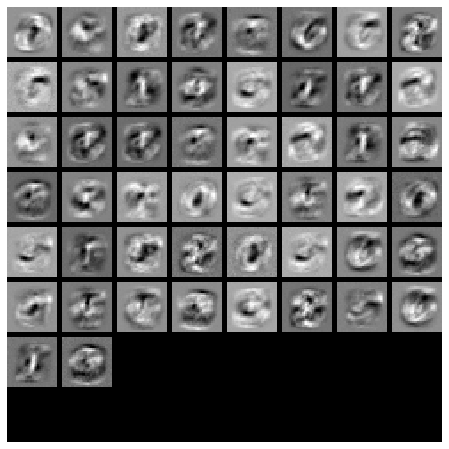

In [23]:
# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(28, 28, 1, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8').squeeze(axis=2))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 97.4% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on MNIST as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [82]:
best_net = None # store the best model into this 

#################################################################################
# TODO#8: Tune hyperparameters using the validation set. Store your best trained#
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
best_net = net
best_loss = 100
best_acc = (best_net.predict(X_val) == y_val).mean()

best_hidden_size = 50
best_learning_rate = 5e-4
best_batch_size = 200
best_reg_strength = 0
tune_iter = 1

print('hidden_size', best_hidden_size)
print('learning_rate', best_learning_rate)
print('batch_size', best_batch_size)
print('reg_strength', best_reg_strength)
batch_size_list = [50, 100, 200]
for bs in batch_size_list:
  temp = TwoLayerNet(input_size, best_hidden_size, num_classes)
  res = temp.train(X_train, y_train, X_val, y_val,
                      num_iters=2000, batch_size=best_batch_size,
                      learning_rate=best_learning_rate, learning_rate_decay=0.95,
                      reg=best_reg_strength, verbose=True)
  print('batch size:', bs)
  # loss = res['loss_history'][-1]
  # print('loss:', loss)
  # if loss < best_loss:
  #   best_net = temp
  #   best_loss = loss
  #   best_batch_size=bs
  acc = (temp.predict(X_val) == y_val).mean()
  print('accuracy', acc)
  if (acc > best_acc):
    best_net = temp
    best_acc = acc
    best_batch_size=bs
#################################################################################
hidden_size_list = np.arange(30, 70, 5)
for hs in hidden_size_list:
  temp = TwoLayerNet(input_size, hs, num_classes)
  res = temp.train(X_train, y_train, X_val, y_val,
                      num_iters=2000, batch_size=best_batch_size,
                      learning_rate=best_learning_rate, learning_rate_decay=0.95,
                      reg=best_reg_strength, verbose=True)
  print('hidden size:', hs)
  # loss = res['loss_history'][-1]
  # print('loss:', loss)
  # if loss < best_loss:
  #   best_net = temp
  #   best_loss = loss
  #   best_hidden_size=hs
  acc = (temp.predict(X_val) == y_val).mean()
  print('accuracy', acc)
  if (acc > best_acc):
    best_net = temp
    best_acc = acc
    best_hidden_size=hs
#################################################################################
learning_rate_list = [5e-3, 1e-4, 5e-4, 1e-5, 5e-5]
for lr in learning_rate_list:
  temp = TwoLayerNet(input_size, best_hidden_size, num_classes)
  res = temp.train(X_train, y_train, X_val, y_val,
                      num_iters=2000, batch_size=best_batch_size,
                      learning_rate=lr, learning_rate_decay=0.95,
                      reg=best_reg_strength, verbose=True)
  print('learning rate:', lr)
  # loss = res['loss_history'][-1]
  # print('loss:', loss)
  # if loss < best_loss:
  #   best_net = temp
  #   best_loss = loss
  #   best_learning_rate=lr
  acc = (temp.predict(X_val) == y_val).mean()
  print('accuracy', acc)
  if (acc > best_acc):
    best_net = temp
    best_acc = acc
    best_learning_rate=lr
#################################################################################
reg_strength_list = np.arange(0, 0.6, 0.05)
for rs in reg_strength_list:
  temp = TwoLayerNet(input_size, best_hidden_size, num_classes)
  res = temp.train(X_train, y_train, X_val, y_val,
                      num_iters=2000, batch_size=best_batch_size,
                      learning_rate=best_learning_rate, learning_rate_decay=0.95,
                      reg=rs, verbose=True)
  print('regularization strength:', rs)
  # loss = res['loss_history'][-1]
  # print('loss:', loss)
  # if loss < best_loss:
  #   best_net = temp
  #   best_loss = loss
  #   best_reg_strength=rs
  acc = (temp.predict(X_val) == y_val).mean()
  print('accuracy', acc)
  if (acc > best_acc):
    best_net = temp
    best_acc = acc
    best_reg_strength=rs
#################################################################################
#                               END OF TODO#8                                   #
#################################################################################

hidden_size 50
learning_rate 0.0005
batch_size 200
reg_strength 0
batch size: 50
accuracy 0.9408
batch size: 100
accuracy 0.9432
batch size: 200
accuracy 0.9422
hidden size: 30
accuracy 0.9422
hidden size: 35
accuracy 0.9412
hidden size: 40
accuracy 0.9396
hidden size: 45
accuracy 0.9402
hidden size: 50
accuracy 0.9444
hidden size: 55
accuracy 0.9464
hidden size: 60
accuracy 0.9426
hidden size: 65
accuracy 0.9434
learning rate: 0.005
accuracy 0.9748
learning rate: 0.0001
accuracy 0.8838
learning rate: 0.0005
accuracy 0.942
learning rate: 1e-05
accuracy 0.4576
learning rate: 5e-05
accuracy 0.6804
regularization strength: 0.0
accuracy 0.9728
regularization strength: 0.05
accuracy 0.9728
regularization strength: 0.1
accuracy 0.9768
regularization strength: 0.15000000000000002
accuracy 0.975
regularization strength: 0.2
accuracy 0.9746
regularization strength: 0.25
accuracy 0.9728
regularization strength: 0.30000000000000004
accuracy 0.9712
regularization strength: 0.35000000000000003
accu

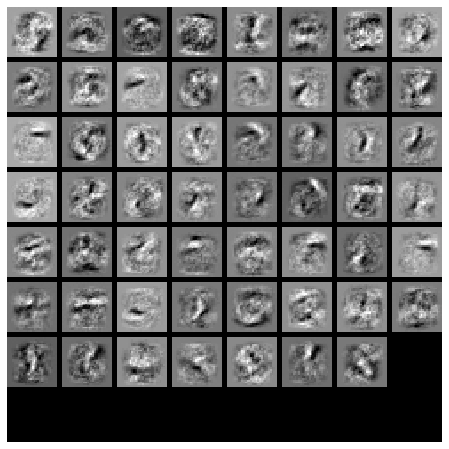

In [86]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 96.3%.

In [84]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9741


In [87]:
print('best batch size', best_batch_size)
print('best hidden size', best_hidden_size)
print('best learning rate', best_learning_rate)
print('best regularization strength', best_reg_strength)
print('best acc on validation',  best_acc)

best batch size 200
best hidden size 55
best learning rate 0.005
best regularization strength 0.1
best acc on validation 0.9768
